<a href="https://colab.research.google.com/github/chairwood/takehomeinterview/blob/master/DiepLearningStockForecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Stock forecaster utilizing AI Capstone Project
#Long short term memory
#Look into support vector regression and linear regression

#Potential stocks: TSLA, AAPL, GOOGL, S&P500, SNAP, UBER, AMZN

#Tensor, vectors generalized to higher dimensions

#Links
#https://towardsdatascience.com/how-to-download-all-historic-intraday-ohcl-data-from-iex-with-python-asynchronously-via-api-b5b04a31b187
#https://www.tutorialspoint.com/python/python_gui_programming.htm
#https://colah.github.io/posts/2015-08-Understanding-LSTMs/
#https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
#https://dzone.com/articles/machine-learning-getting-data-into-right-shape
#GUI tut
# https://www.youtube.com/watch?v=D8-snVfekto

In [ ]:
#https://www.youtube.com/watch?v=AF8zgxLukg4
#https://www.youtube.com/watch?v=m1LNunuI2fk
# https://www.youtube.com/watch?v=tPYj3fFJGjk
# https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=5&t=0s
# https://www.youtube.com/watch?v=8OpMAlYyH5Y&list=PLea0WJq13cnB_ORdGzEkPlZEN20TSt6Lx&index=10
# https://www.youtube.com/watch?v=7n1SpeudvAE

In [ ]:
import math
import pandas_datareader as web
import numpy  as nmp
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense, LSTM, MaxPool1D, AveragePooling1D, Permute
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt

import time

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('fivethirtyeight')

In [ ]:
#Gets stock pricepoints of: MCD
#From 2010 to now
df = web.DataReader('MCD', data_source='yahoo', start='1999-01-01', end='2019-01-01')

#prints the table
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-04,39.312500,38.218750,38.687500,38.468750,4428000.0,22.730003
1999-01-05,38.937500,38.125000,38.593750,38.312500,4712800.0,22.637680
1999-01-06,39.218750,38.593750,38.750000,38.906250,7639400.0,22.988506
1999-01-07,39.312500,38.375000,38.437500,38.937500,4137000.0,23.006969
1999-01-08,40.375000,38.750000,38.812500,40.250000,4398800.0,23.782492
...,...,...,...,...,...,...
2018-12-24,175.270004,170.169998,174.240005,170.279999,2400900.0,163.184235
2018-12-26,174.039993,169.039993,170.089996,174.029999,4065500.0,166.777969
2018-12-27,175.710007,170.729996,173.289993,175.710007,3934500.0,168.387970


In [ ]:
#Gets the num of rows/columns
df.shape

(5031, 6)

In [ ]:
#Sort only the closing prices
data = df.filter(['Close'])
#Converts the set into an array for numpy
dataset = data.values
#Gets the number of rows to train with
#Note: maybe changing the percentage will affect the accuracy ??
training_data_length = math.ceil(len(dataset) * .8)
#Prints the number of rows to give to the agent
training_data_length

4025

In [ ]:
#Scaling data as the 10 year low to be min and the 10 year high to be the max
scaler = MinMaxScaler(feature_range=(0,1))
#Data will be from 0 inclusive to 1 inclusive
scaled_data = scaler.fit_transform(dataset)
#Prints the scaled data
scaled_data

array([[0.14749407],
       [0.1466107 ],
       [0.1499675 ],
       ...,
       [0.92339446],
       [0.92254637],
       [0.93391007]])

In [ ]:
#Create the training data set
#Create the scaled training dataset

#Collect all the values scaled data
train_data = scaled_data[0:training_data_length, :]
#Split the data in x_train and y_train data sets
x_train = []
y_train = []


#try to decrease this window
for i in range(60, len(train_data)):
  #Appends the 60 values before i, excluding i, for x_train
  x_train.append(train_data[i-60:i])
  #Appends the ith value
  y_train.append(train_data[i,0])
  
  if i<= 60:
    print(x_train) 
    print(y_train)
    print()
  

[array([[0.14749407],
       [0.1466107 ],
       [0.1499675 ],
       [0.15014417],
       [0.15756445],
       [0.15014417],
       [0.14290056],
       [0.14767074],
       [0.14502064],
       [0.14908413],
       [0.15385431],
       [0.14979082],
       [0.14678737],
       [0.14484397],
       [0.14449062],
       [0.15314762],
       [0.1519109 ],
       [0.15085086],
       [0.15279427],
       [0.15438433],
       [0.15350097],
       [0.16003788],
       [0.15827115],
       [0.15703443],
       [0.1586245 ],
       [0.15685776],
       [0.15579772],
       [0.16180462],
       [0.15986121],
       [0.1612746 ],
       [0.15756445],
       [0.16445472],
       [0.171875  ],
       [0.17205168],
       [0.17222835],
       [0.17028494],
       [0.16763484],
       [0.17028494],
       [0.17470178],
       [0.18406547],
       [0.1812387 ],
       [0.18477217],
       [0.19660929],
       [0.18583221],
       [0.17593849],
       [0.17735188],
       [0.18265209],
       [0.17

In [ ]:
#Convert the sets into arrays
x_train, y_train = nmp.array(x_train), nmp.array(y_train)



In [ ]:
#Displays the shape, important, we need to have 3 elements
x_train.shape


(3965, 60, 1)

In [ ]:
#NEW one
#Convert the sets into arrays
x_train2, y_train2 = nmp.array(x_train), nmp.array(y_train)


In [ ]:
#NEW one
#Splitting into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(    
    x_train2, y_train2, test_size=0.20, random_state=42)

In [ ]:
#Neural Network
#Build 4 layers, with 50, 50, 25, 1 and neural network for the LSTM model
#Keras squential
#RMSprop
#SGD
#Adam, play with the learning rate
#Sequence processing, useful time series
#learn about neural network, before layers
#reccurent layers LSTM, RNN, SImpleRNNCell, LSTMcells
#Keep dense layer with the 1 node (DO NOT TOUCH)
#Can replace the dense(25) with MaxPOOLing1D, AveragePooling1D
#possibly reduce to 1 LSTM and add more dense layer
#Look into changing the # of node from 50 to 20, play with this
#LSTM activation: https://keras.io/activations/
#Random forest method, XGboost, HMM (hidden markov model), hmm.learn


#Neural networks - multistaged information extraction process
#Our data gets transformed after each layer
#Supervised model - continually adjusting model to become more
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))   #input layer, disregards bias for this layer, but sets bias for next layer
model.add(LSTM(50, return_sequences=False))
# keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last')
# model.add(Permute((2, 1)))
# model.add(MaxPooling1D(pool_size=2, strides=None))
model.add(Dense(25))
model.add(Dense(1))

#save the network .h5
#use GUI to call .h5

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile model
#https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
#Adam is really fast
#play with the loss function, mae, 
#add learning rate
#import optimizer with different learning rate, keras.adam
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])   #mae

In [ ]:
#Fit/Train the model to the training data
#For sure increase bath_size and epoch
#epoch - # of times sees the entire data
#batch - # of samples shown (Try 10) increase to the point where I don't get GPU/memory err
#model.fit
#model is saved as a .h5 file
#Save the best fit as each epoch, Keras will save the best fit
#Split data into validation and training



# model.fit(x_train, y_train, batch_size=10, epochs=3)  #test 20, modify the model.fit to account for the 80%training/20%validation
monitor = EarlyStopping(monitor='mse', min_delta=1e-6, patience=5, verbose=1, mode='min', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

#add validation on model.fit
#use first 80% for training and last 20% for validation   #maybe have a "holdout set"?
#track mse and for the validation
#how to save .h5 file in keras/how to load
#email vakilian

Epoch 1/1000
100/100 - 11s - loss: 0.0030 - mse: 0.0030 - val_loss: 8.1776e-05 - val_mse: 8.1776e-05
Epoch 2/1000
100/100 - 11s - loss: 6.9400e-05 - mse: 6.9400e-05 - val_loss: 9.0304e-05 - val_mse: 9.0304e-05
Epoch 3/1000
100/100 - 11s - loss: 7.0265e-05 - mse: 7.0265e-05 - val_loss: 6.4202e-05 - val_mse: 6.4202e-05
Epoch 4/1000
100/100 - 11s - loss: 6.4252e-05 - mse: 6.4252e-05 - val_loss: 6.7590e-05 - val_mse: 6.7590e-05
Epoch 5/1000
100/100 - 11s - loss: 6.3334e-05 - mse: 6.3334e-05 - val_loss: 6.3036e-05 - val_mse: 6.3036e-05
Epoch 6/1000
100/100 - 11s - loss: 5.9998e-05 - mse: 5.9998e-05 - val_loss: 7.4783e-05 - val_mse: 7.4783e-05
Epoch 7/1000
100/100 - 11s - loss: 6.8560e-05 - mse: 6.8560e-05 - val_loss: 5.9606e-05 - val_mse: 5.9606e-05
Epoch 8/1000
100/100 - 11s - loss: 5.9222e-05 - mse: 5.9222e-05 - val_loss: 6.7473e-05 - val_mse: 6.7473e-05
Epoch 9/1000
100/100 - 11s - loss: 5.8050e-05 - mse: 5.8050e-05 - val_loss: 5.7976e-05 - val_mse: 5.7976e-05
Epoch 10/1000
100/100 - 11s

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [42]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

# model.save('saved_model/my_model') 

./1601669579.h5


In [ ]:
##Creating the testing dataset
#Creates a new array containing scaled values from 1911, the number in the above cell, and 2463, the number of original rows
test_data = scaled_data[training_data_length - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_length: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the sets into arrays
x_test = nmp.array(x_test)

In [ ]:
#Reshape the data
x_test = nmp.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#shape[0] = # of samples, shape[1] = # of timesteps, 1 feature of close price
#Displays the shape, important, we need to have 3 elements
x_test.shape

(1006, 60, 1)

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
#Kind of unscaling the dataset from earlier? Maybe try to leave the data unscaled?
predictions = scaler.inverse_transform(predictions)
print(y_test)

#Ideally, the predictions are similar to the y_test values

[[ 93.26000214]
 [ 92.23000336]
 [ 92.40000153]
 ...
 [175.71000671]
 [175.55999756]
 [177.57000732]]


In [ ]:
#Loss/Cost Function - Gradient Descent
#Get the root mean squared error (RMSE)
#Mean aboslute error
#Hinge Loss
# rmse = nmp.sqrt(nmp.mean(predictions - y_test)**2)
# rmse


rmse = nmp.sqrt(nmp.mean((predictions - y_test)**2))
rmse

#The lower the number the better

3.0390849824640176

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


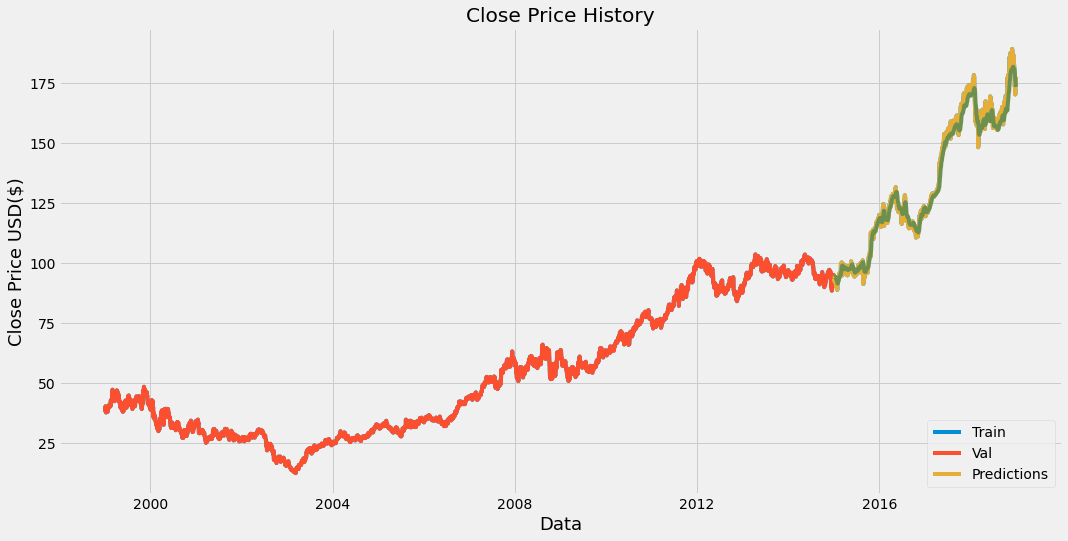

In [ ]:
#plot the data
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions

#Show the closing price history
#The Train being the data given, Val being actual value to compare with Predictions made by the AI
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])   #Actual closing prices
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])  
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the actual price compared predicted prices
valid

,Close,Predictions
Date,,
2015-01-02,93.260002,94.241791
2015-01-05,92.230003,94.338318
2015-01-06,92.400002,94.293686
2015-01-07,94.010002,94.180038
2015-01-08,94.360001,94.144890
...,...,...
2018-12-24,170.279999,177.280472
2018-12-26,174.029999,175.943726
2018-12-27,175.710007,174.820572


In [ ]:
#Forcasting the next day's price using just the last 60 days
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2009-01-02', end='2019-01-02')
#create new dataframe
new_df = tesla_quote.filter(['Close'])
#get the last 60 dayt closing price values and covnert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
#Convert the set to an array
X_test = nmp.array(X_test)
#Reshape the data
#Needs to be 3 elements
X_test = nmp.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[[65.78512]]


In [ ]:
#Forcasting the next day's price
tesla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2019-01-02', end='2019-01-02')
print(tesla_quote2['Close'])

Date
2019-01-02    62.023998
Name: Close, dtype: float64


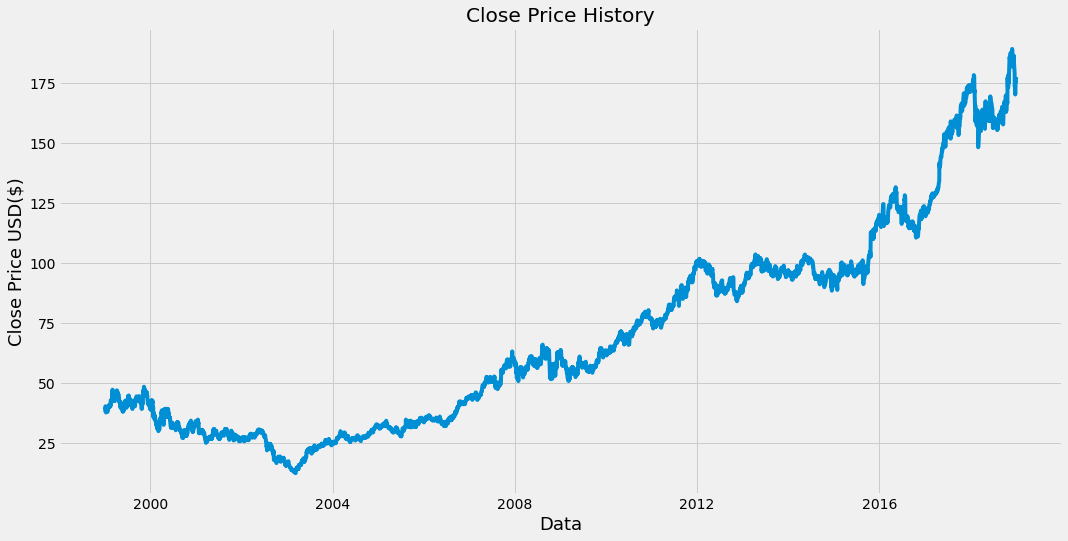

In [ ]:
#Show the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()